<a href="https://colab.research.google.com/github/ummd/ummd.github.io/blob/master/Teaching/RSM3053/Lecture3/Lecture3cc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3cc

## Test Statistics

This example will demonstrate the statistical properties of the test statistic

$$t = \frac{\hat\beta - \beta_{\text{null}}}{\text{SE}(\hat\beta)}$$


## The Statistical Properties of the test statistic under the ALTERNATIVE hypothesis w/ HETEROGENEITY

This example will demonstrate the distribution of the test statistic under an alternative hypothesis with heterogeneity $\beta_0=0$, $\beta_1=0.15$

**i.e., what would the test statistics look like if the alternative were true?**

In [32]:
S <- 1000 #number of samples
n <- 800 #number of observations per sample

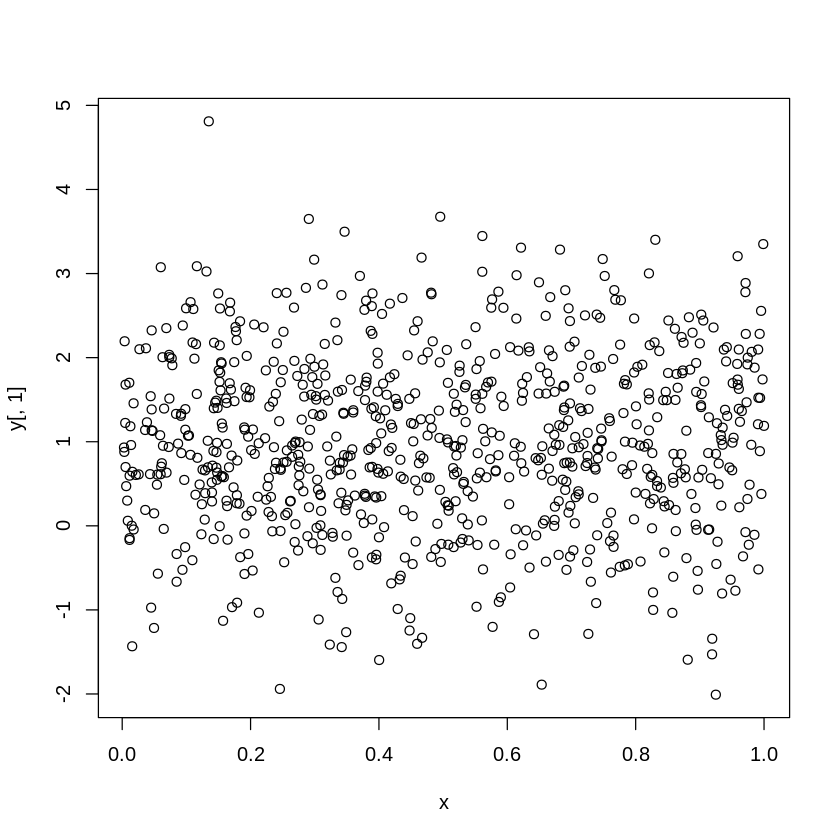

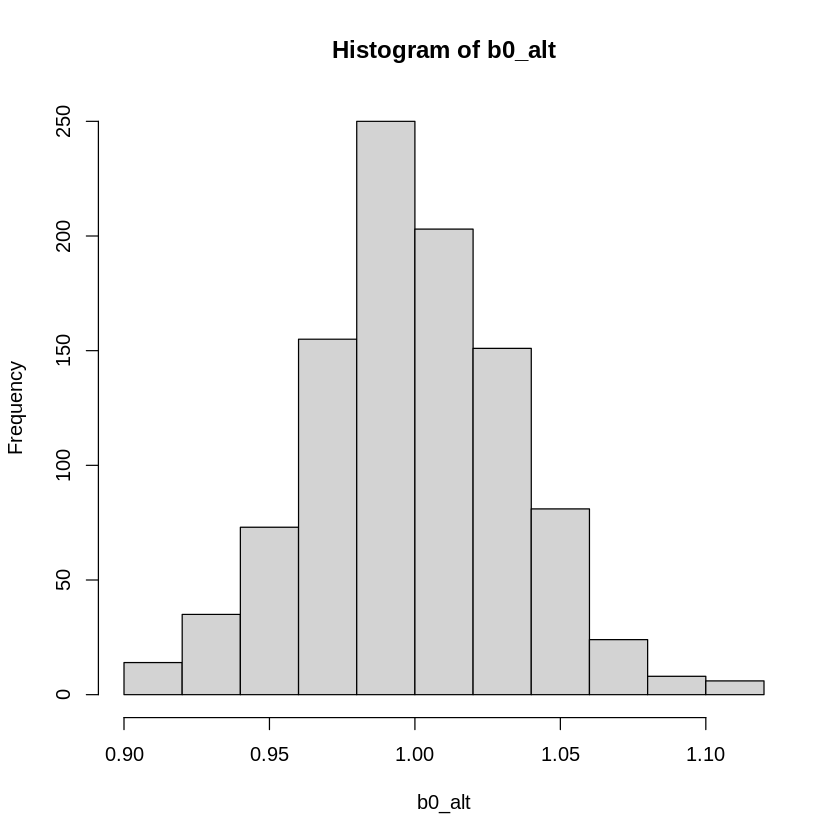

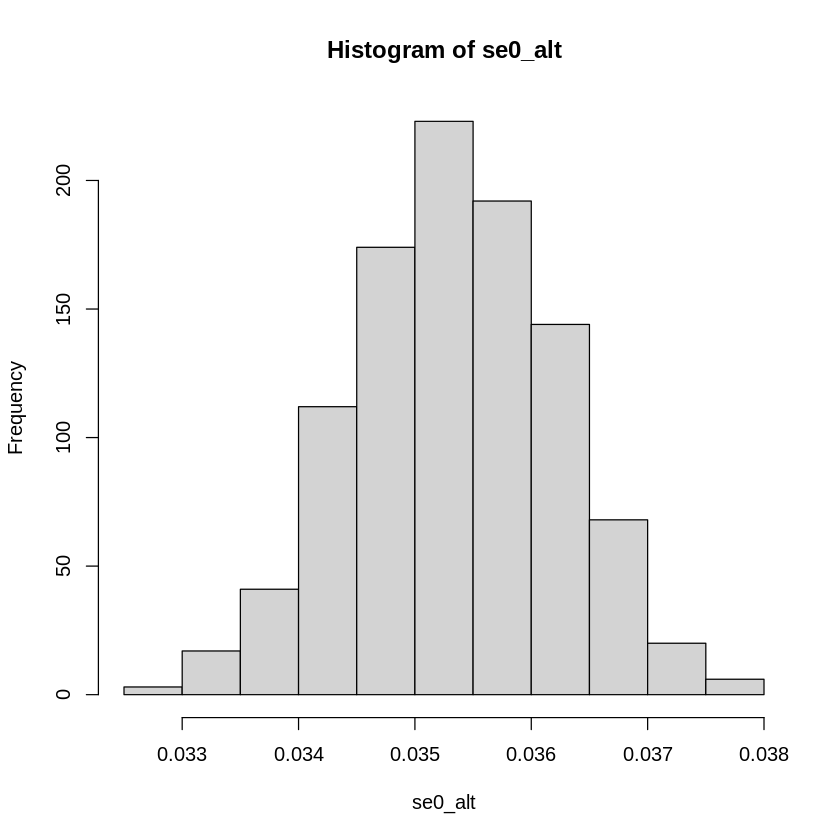

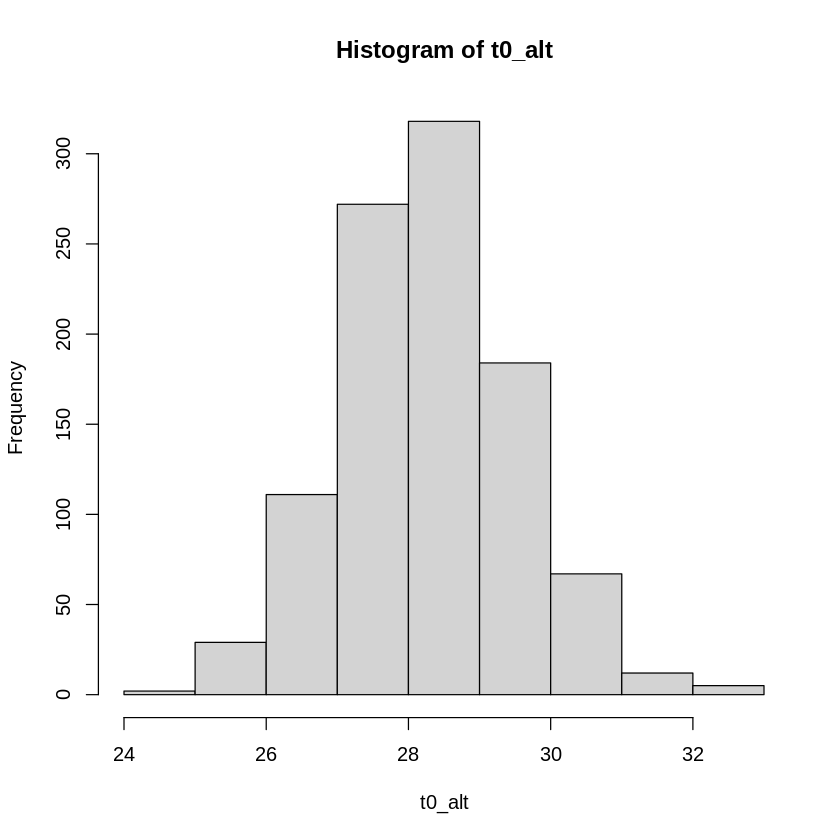

In [37]:

b0 <- 1

set.seed(1)
e <- replicate(S,rnorm(n)) #draw S samples

x <- runif(n)

y <- b0 + e

b0_alt <- vector( "numeric" , S )
se0_alt <- vector( "numeric" , S )
t0_alt <- vector( "numeric" , S )

for (s in 1:S){
    lm.fit=lm(y[,s]~1) # estimate the linear model on the sample s.
    b0_alt[s] <- summary(lm.fit)$coefficients[1,1] #store estimate for beta_0
    se0_alt[s] <- summary(lm.fit)$coefficients[1,2]   #store the tstat for beta_0
    t0_alt[s] <- summary(lm.fit)$coefficients[1,3]   #store the tstat for beta_0
}
plot(x,y[,1])
hist(b0_alt)
hist(se0_alt)
hist(t0_alt)


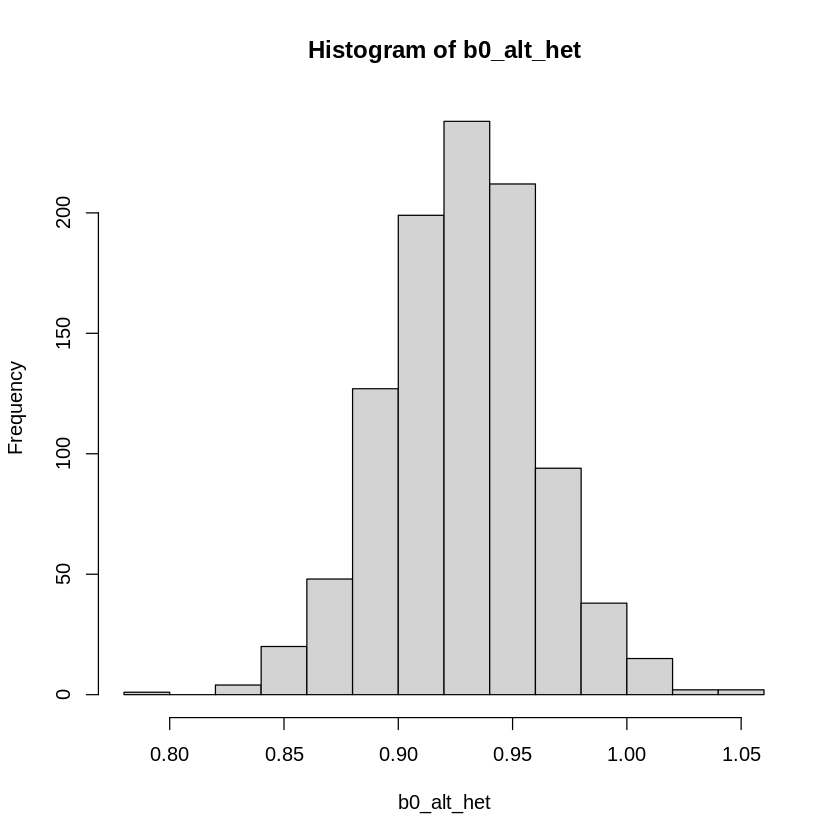

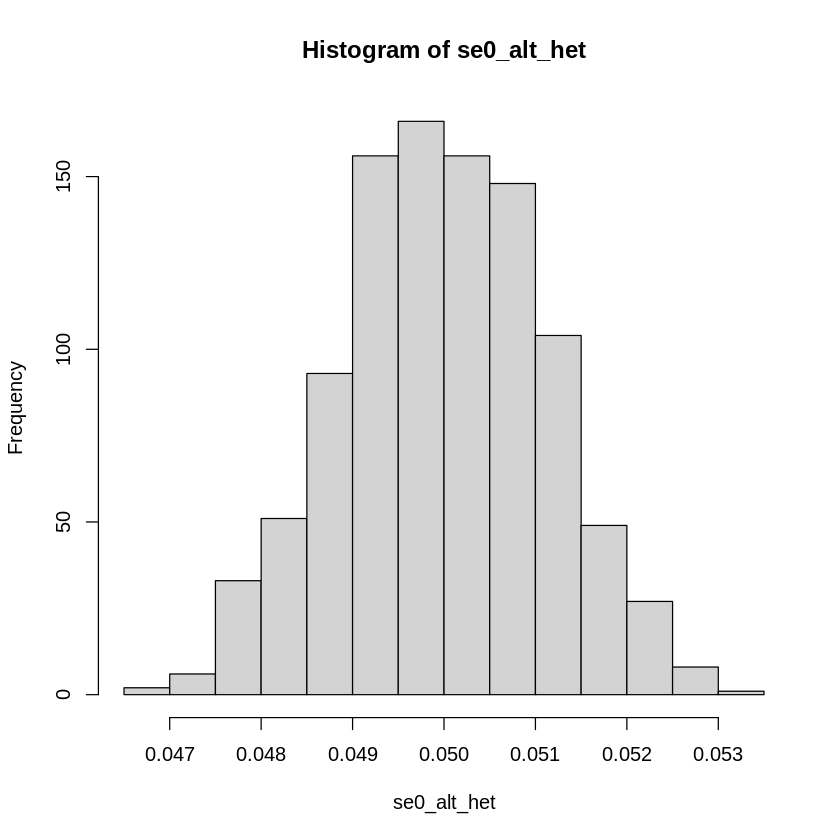

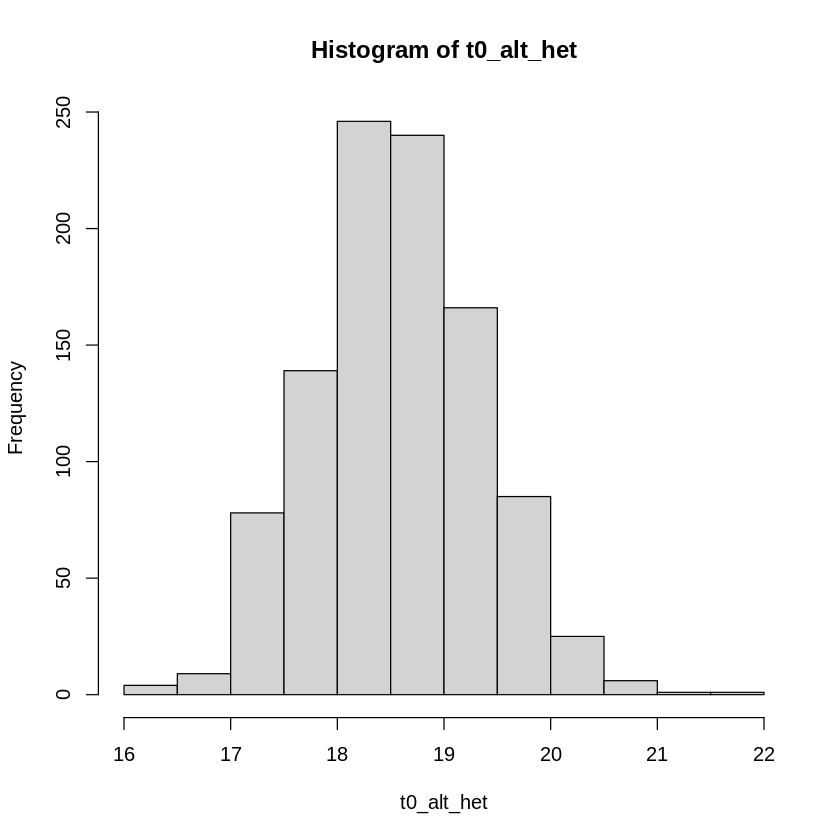

In [38]:

b1 <- 0 #for G1, null is true
b2 <- 2 #the alternative is true

set.seed(3)
e <- replicate(S,rnorm(n)) #draw S samples

G1 <- rbinom(n,1,.5)
G2 <- 1-G1

y <- b1*G1 + b2*G2 + e

b0_alt_het <- vector( "numeric" , S )
se0_alt_het <- vector( "numeric" , S )
t0_alt_het <- vector( "numeric" , S )

for (s in 1:S){
    lm.fit=lm(y[,s]~1) # estimate the linear model on the sample s.
    b0_alt_het[s] <- summary(lm.fit)$coefficients[1,1]   #store the estimate for beta_0 **note this beta_0 is the estimated effect for both groups**
    se0_alt_het[s] <- summary(lm.fit)$coefficients[1,2]   #store the tstats for beta_0
    t0_alt_het[s] <- summary(lm.fit)$coefficients[1,3]   #store the tstats for beta_0
}
hist(b0_alt_het)
hist(se0_alt_het)
hist(t0_alt_het)

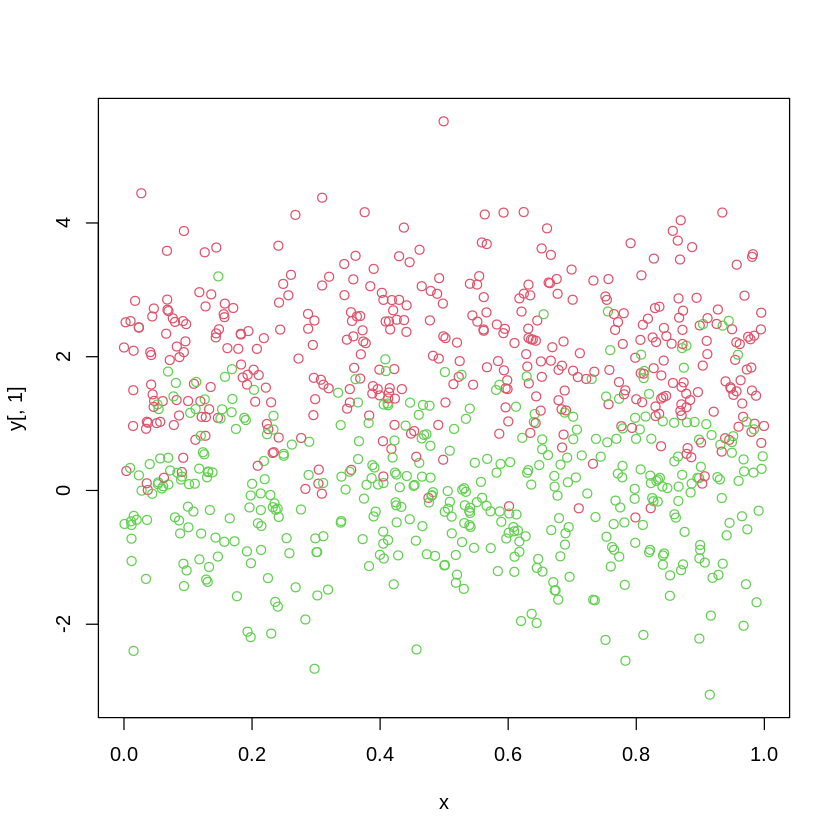

In [16]:
plot(x,y[,1],col=G1+2)

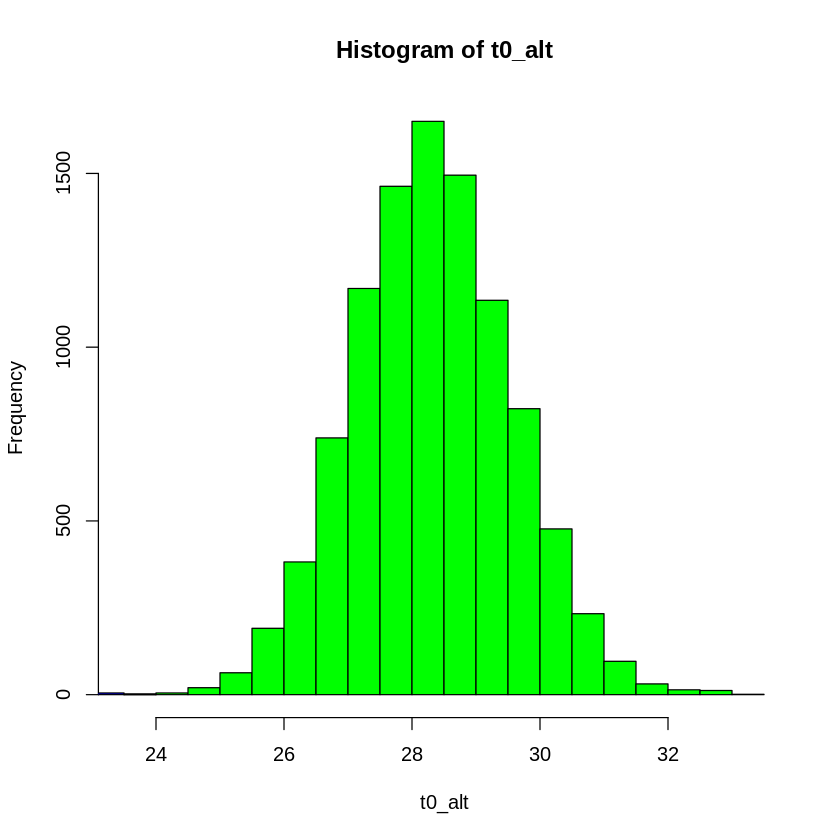

In [6]:
hist(t0_alt, col='green')
hist(t0_alt_het, col='blue', add=TRUE)

In [8]:
install.packages('ggplot2')
library('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


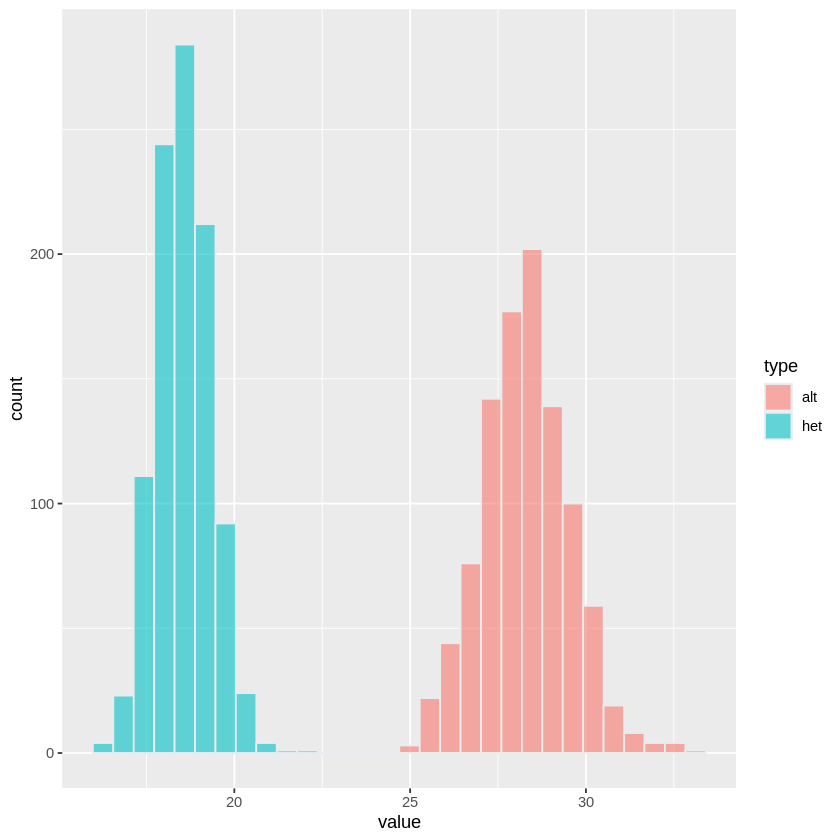

In [35]:

data <- data.frame(
  type = c(rep("alt", S),rep("het", S)),
  value = c(t0_alt,t0_alt_het) )

ggplot(data, aes(x=value, fill=type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity')


Notice how this distribution where there is no heterogneity is shifted to the right (compared to the distribution with heterogeneity)?

This is because it has more power to reject the false null

In [40]:
mean(b0_alt)
mean(b0_alt_het)

[1] 0.9993522

[1] 0.9278311

In [39]:
var(b0_alt)
var(b0_alt_het)
sd(b0_alt)
sd(b0_alt_het)

[1] 0.001209298

[1] 0.001123733

[1] 0.03477496

[1] 0.03352213

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


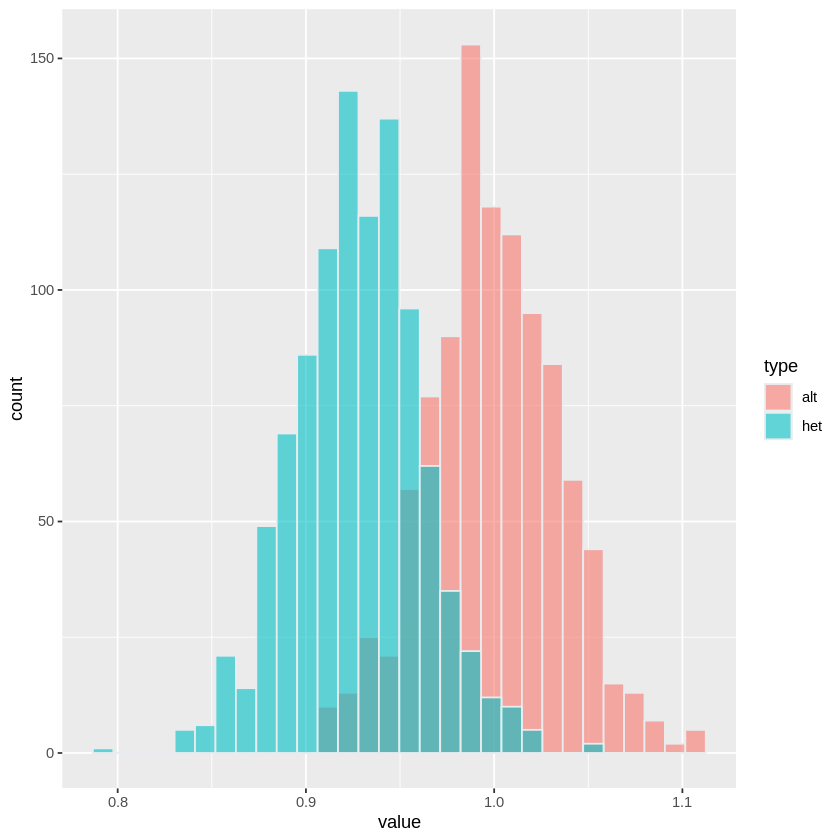

In [28]:
data <- data.frame(
  type = c(rep("alt", S),rep("het", S)),
  value = c(b0_alt,b0_alt_het) )

ggplot(data, aes(x=value, fill=type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


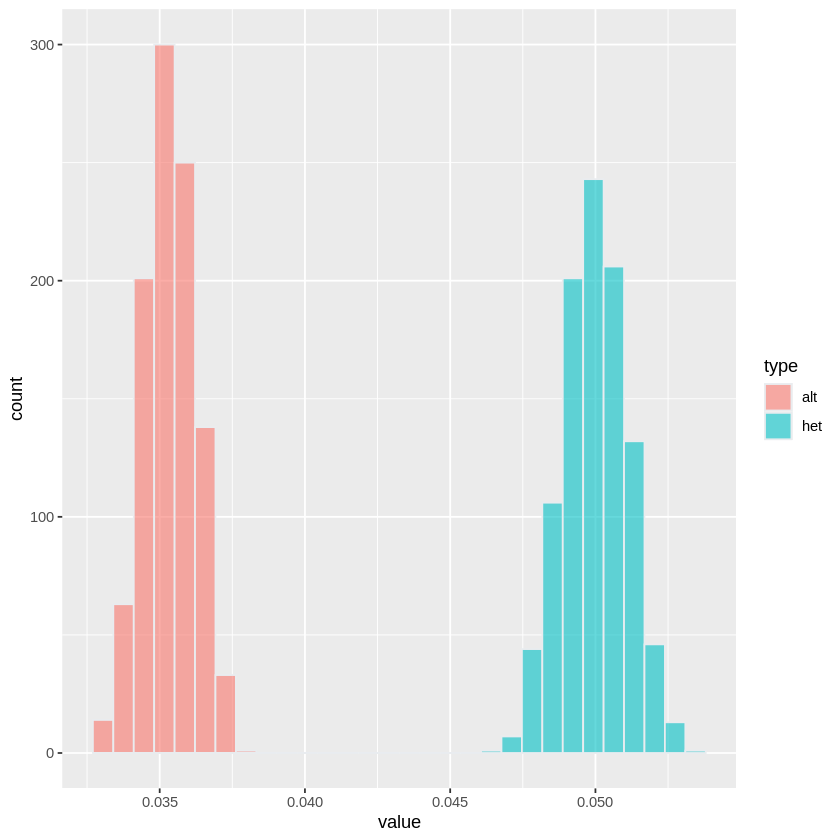

In [29]:
data <- data.frame(
  type = c(rep("alt", S),rep("het", S)),
  value = c(se0_alt,se0_alt_het) )

ggplot(data, aes(x=value, fill=type)) +
    geom_histogram( color="#e9ecef", alpha=0.6, position = 'identity')